In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
tf.__version__

'2.12.0'

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))


In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 16s 8ms/step - loss: 0.1456 - accuracy: 0.9554


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0388 - accuracy: 0.9878


In [16]:
print(test_acc)

0.9878000020980835


In [17]:
#save the model and use this model to predict the new data
model.save('tf23cnnmodel1.h5')

In [18]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
test_image = np.expand_dims(test_images[69],axis = 0)

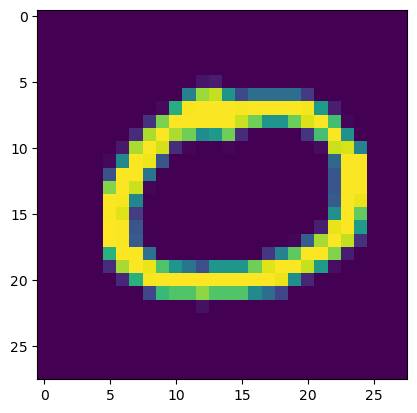

In [44]:
plt.imshow(test_image.reshape(28,28))

In [41]:
result = model.predict(test_image)

1/1 [==============================] - 0s 14ms/step


In [42]:
result

array([[9.9035943e-01, 8.5077680e-08, 1.4385250e-05, 4.2622656e-07,
        1.7863301e-09, 1.8761985e-04, 4.5621113e-05, 2.4240188e-07,
        1.1502423e-06, 9.3909595e-03]], dtype=float32)

In [43]:
result.argmax()

0